CNN Modell wird hier aufgebaut und auf Bilder mit 128x128 angewandt

In [1]:
import os
import tensorflow as tf 
from tensorflow import keras 
from keras.regularizers import L2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_height = 128
img_width =128
batch_size=64


In [3]:
#import train Dataset with seperate validation Dataset

ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

ds_val=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 9343 files belonging to 6 classes.
Using 7475 files for training.
Found 2156 files belonging to 6 classes.
Using 431 files for validation.


In [4]:
#Klassennamen ausgeben und speichenr
class_names=ds_train.class_names
print(class_names)

['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb', 'Zwiebel', 'Zwiebel_Trieb']


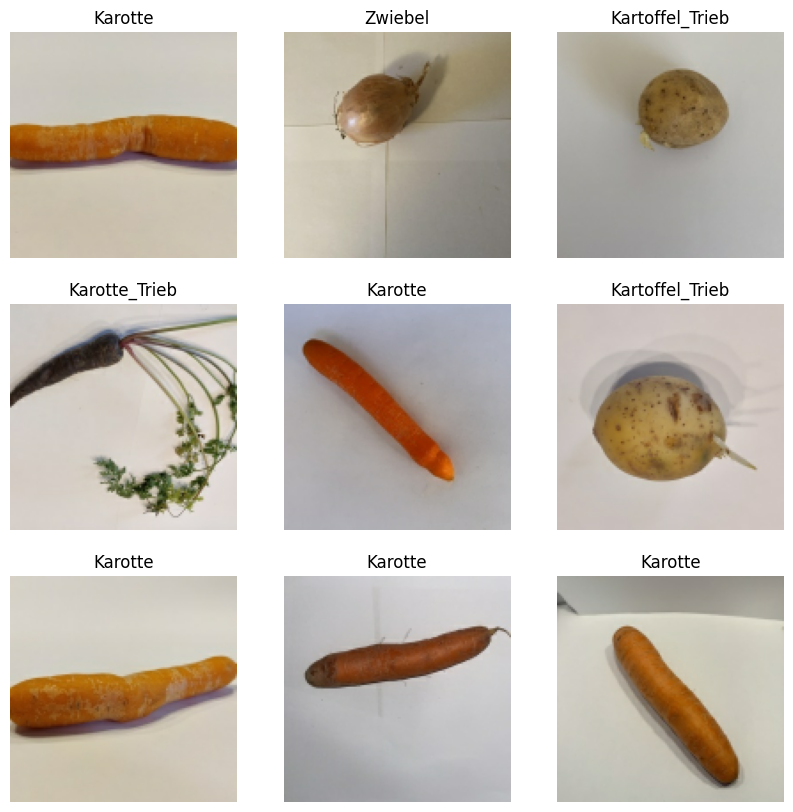

In [5]:
#Bilder einfach mal ausgeben lassen
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
#batch und Bildgrößen ausgeben lassen
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 128, 128, 3)
(64,)


In [7]:
#Modell definieren 2 Conv2D layer und am ende ein voll vernetztes 
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01),input_shape=[img_height,img_width, 3]),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])


In [8]:
#Modell Kompilieren
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [9]:
#Modell trainieren
epoch=50
history=model.fit(
  ds_train,
  validation_data=ds_val,
  epochs=epoch
)

Epoch 1/50


C:\Users\Lennart Pc\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


117/117 [==============================] - 85s 723ms/step - loss: 1.7653 - accuracy: 0.4631 - val_loss: 0.9838 - val_accuracy: 0.7610
Epoch 2/50
117/117 [==============================] - 89s 758ms/step - loss: 0.9356 - accuracy: 0.7397 - val_loss: 0.7379 - val_accuracy: 0.7865
Epoch 3/50
117/117 [==============================] - 83s 708ms/step - loss: 0.7404 - accuracy: 0.8025 - val_loss: 0.5860 - val_accuracy: 0.8701
Epoch 4/50
117/117 [==============================] - 82s 699ms/step - loss: 0.5595 - accuracy: 0.8654 - val_loss: 0.4382 - val_accuracy: 0.9142
Epoch 5/50
117/117 [==============================] - 77s 660ms/step - loss: 0.4668 - accuracy: 0.8927 - val_loss: 0.3774 - val_accuracy: 0.9397
Epoch 6/50
117/117 [==============================] - 78s 661ms/step - loss: 0.4130 - accuracy: 0.9074 - val_loss: 0.3339 - val_accuracy: 0.9443
Epoch 7/50
117/117 [==============================] - 78s 664ms/step - loss: 0.3605 - accuracy: 0.9200 - val_loss: 0.3116 - val_accuracy: 0.9

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0

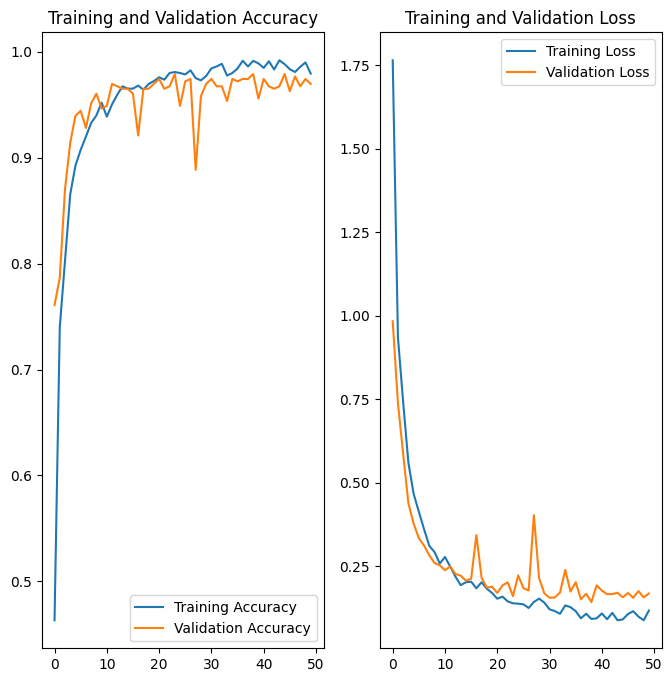

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
ds_test=tf.keras.utils.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/Test_set/',
    color_mode='rgb',
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,   
)

Found 339 files belonging to 6 classes.


In [13]:
result=model.evaluate(ds_test)

6/6 [==============================] - 7s 469ms/step - loss: 0.6523 - accuracy: 0.8555


In [14]:
test=tf.keras.utils.load_img('D:/Dokumente/Master-Studium/Semester3/test1.jpg', target_size=(img_height, img_width))
test_array = tf.keras.utils.img_to_array(test)
test_array = tf.expand_dims(test_array, 0)

In [15]:
predictions = model.predict(test_array)
score = tf.nn.softmax(predictions[0])
print(predictions)
print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)

1/1 [==============================] - 1s 764ms/step
[[1.0000000e+00 1.0398617e-18 8.9231901e-27 1.5038013e-32 7.7984182e-11
  1.1362633e-18]]
This image most likely belongs to Karotte 


In [18]:
model.save('D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/model_data_augumentation_85p.keras')